# 1. Read Files

In [40]:
import pandas as pd


# df_ha = pd.read_json('../final_data/HA_ALL_nonllm.json', lines=True)
df_iclr = pd.read_json('../final_data/iclr2024_ALL_nonllm.json')
df_neurips = pd.read_json('../final_data/neurips2023_ALL_nonllm.json')

In [41]:
df_iclr.shape, df_neurips.shape

((28028, 34), (15175, 34))

In [42]:
#transform df_iclr['mattr'] to float for each row, if error raised, set 0
def transform_mattr(row):
    try:
        return float(row)
    except ValueError:
        return 0.0
    
#apply the function to the column
df_iclr['mattr'] = df_iclr['mattr'].apply(transform_mattr)

In [ ]:
# df_ha = df_ha.drop(columns=['llm_overall_score_100'])
df_iclr = df_iclr.drop(columns=['llm_overall_score_100'])
df_neurips = df_neurips.drop(columns=['llm_overall_score_100'])

# 2. Correlations

## All Features

In [44]:
#drop review_creation_to_review_submission_days
# df_ha = df_ha.drop(columns=['review_creation_to_review_submission_days'])
df_iclr = df_iclr.drop(columns=['review_creation_to_review_submission_days'])
df_neurips = df_neurips.drop(columns=['review_creation_to_review_submission_days'])

In [45]:
#rename paper_submission_to_review_creation_days to submission_to_revision_days
# df_ha = df_ha.rename(columns={'paper_submission_to_review_creation_days': 'submission_to_revision_days'})
df_iclr = df_iclr.rename(columns={'paper_submission_to_review_submission_days': 'submission_to_revision_days'})
df_neurips = df_neurips.rename(columns={'paper_submission_to_review_submission_days': 'submission_to_revision_days'})

In [46]:
# create new column named hedge_score as follow: 1 - hedge_C / (hedge_E + hedge_D + hedge_C + hedge_N + hedge_I)
# df_ha['hedge_score'] = 1 - df_ha['hedge_C'] / (df_ha['hedge_E'] + df_ha['hedge_D'] + df_ha['hedge_C'] + df_ha['hedge_N'] + df_ha['hedge_I'])
df_iclr['hedge_score'] = 1 - df_iclr['hedge_C'] / (df_iclr['hedge_E'] + df_iclr['hedge_D'] + df_iclr['hedge_C'] + df_iclr['hedge_N'] + df_iclr['hedge_I'])
df_neurips['hedge_score'] = 1 - df_neurips['hedge_C'] / (df_neurips['hedge_E'] + df_neurips['hedge_D'] + df_neurips['hedge_C'] + df_neurips['hedge_N'] + df_neurips['hedge_I'])

# drop hedge_E, hedge_D, hedge_C, hedge_N, hedge_I
# df_ha = df_ha.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_iclr = df_iclr.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_neurips = df_neurips.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])

In [47]:
# drop flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
# df_ha = df_ha.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_iclr = df_iclr.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_neurips = df_neurips.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])

# rename flesch_reading_ease to readability_score
# df_ha = df_ha.rename(columns={'flesch_reading_ease': 'readability_score'})
df_iclr = df_iclr.rename(columns={'flesch_reading_ease': 'readability_score'})
df_neurips = df_neurips.rename(columns={'flesch_reading_ease': 'readability_score'})

In [48]:
#drop columns end with date and submission_number
# df_ha = df_ha.drop(columns=[col for col in df_ha.columns if col.endswith('_date') or col.endswith('submission_number')])
df_iclr = df_iclr.drop(columns=[col for col in df_iclr.columns if col.endswith('_date') or col.endswith('submission_number')])
df_neurips = df_neurips.drop(columns=[col for col in df_neurips.columns if col.endswith('_date') or col.endswith('submission_number')])

In [49]:
#drop submission_to_revision_days
# df_ha = df_ha.drop(columns=['submission_to_revision_days'])
df_iclr = df_iclr.drop(columns=['submission_to_revision_days'])
df_neurips = df_neurips.drop(columns=['submission_to_revision_days'])

In [50]:
#rename the columns as follow: length_words to Comprehensiveness, mattr: Usage_of_Technical_Terms, question_count: Factuality_Q, citation_count: Factuality_C, 
#sentiment_polarity: Sentiment_Polarity, politeness_score: Politeness, readability_score: Clarity_and_Readability, hedge_score: Vagueness, similarity_score: Relevance_Alignment,
#review_rating: Overall_Quality, review_confidence: Confidence, review_soundness: Soundness, review_presentation: Presentation, review_contribution: Contribution
# df_ha = df_ha.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
# 'review_rating': 'Overall_Quality', 'review_confidence': 'Confidence', 'review_soundness': 'Soundness', 'review_presentation': 'Presentation', 'review_contribution': 'Contribution'})
df_iclr = df_iclr.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality', 'review_confidence': 'Confidence', 'review_soundness': 'Soundness', 'review_presentation': 'Presentation', 'review_contribution': 'Contribution'})
df_neurips = df_neurips.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality', 'review_confidence': 'Confidence', 'review_soundness': 'Soundness', 'review_presentation': 'Presentation', 'review_contribution': 'Contribution'})

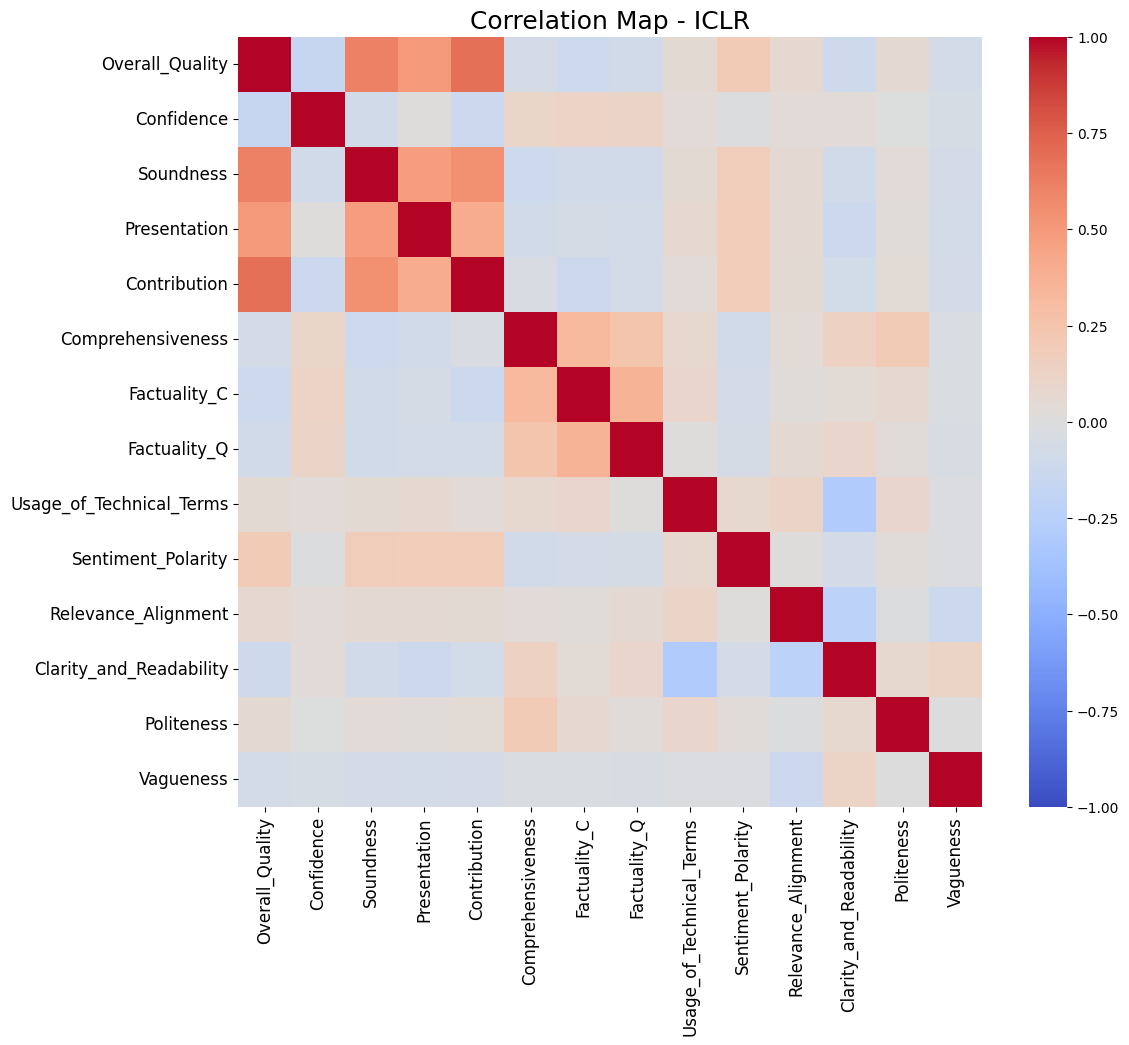

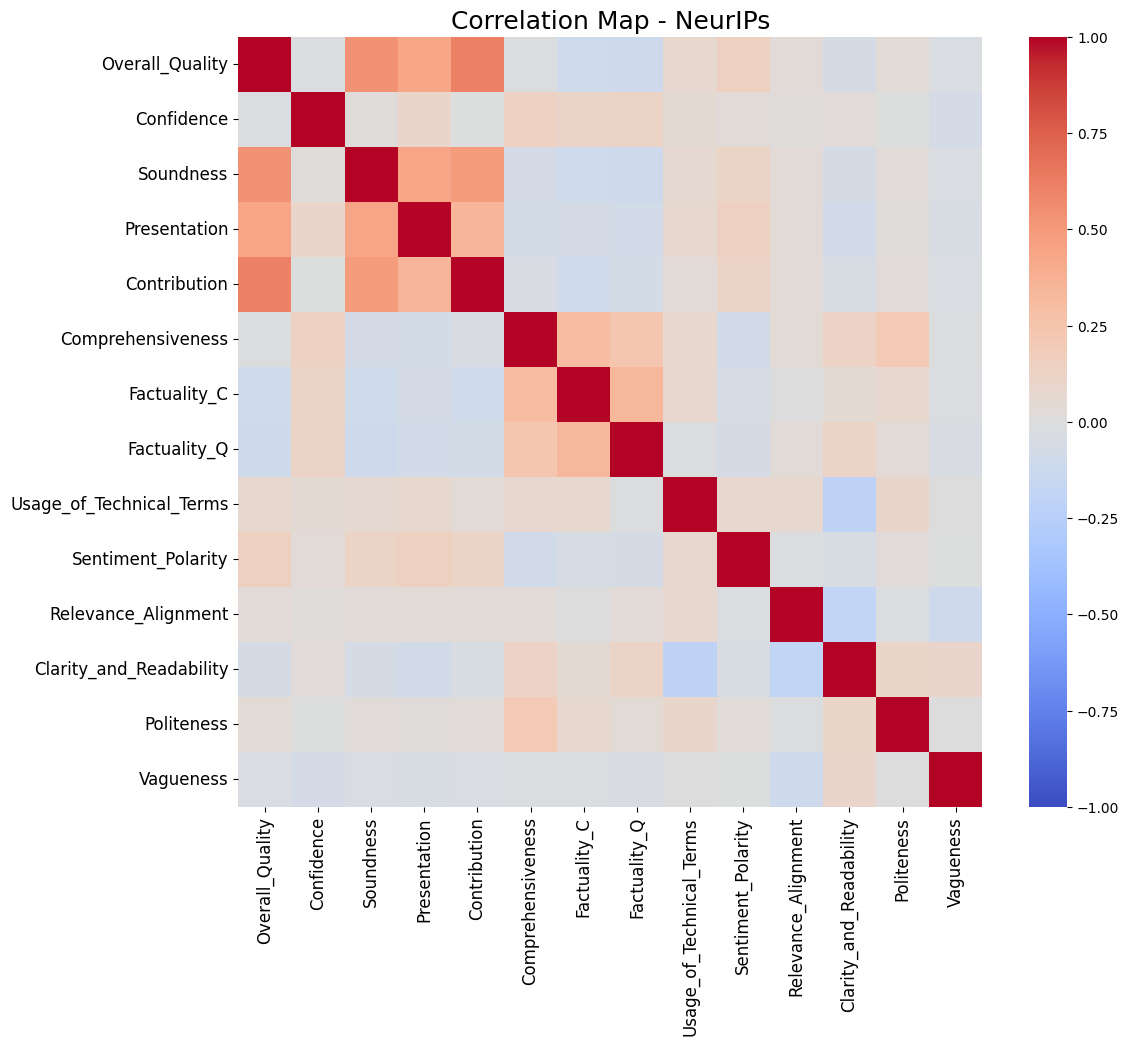

In [51]:
import seaborn as sns

import matplotlib.pyplot as plt

# Function to plot correlation map
def plot_correlation_map(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_columns.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, vmax=1, vmin=-1, center=0)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot correlation maps for each dataframe
# plot_correlation_map(df_ha, 'Correlation Map for df_ha')
plot_correlation_map(df_iclr, 'Correlation Map - ICLR')
plot_correlation_map(df_neurips, 'Correlation Map - NeurIPs')

## LLM-based Features

In [ ]:
df_iclr = pd.read_json('../final_data/iclr2024_1000_llama.json')
df_neurips = pd.read_json('../final_data/neurips2023_1000_llama.json')

/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


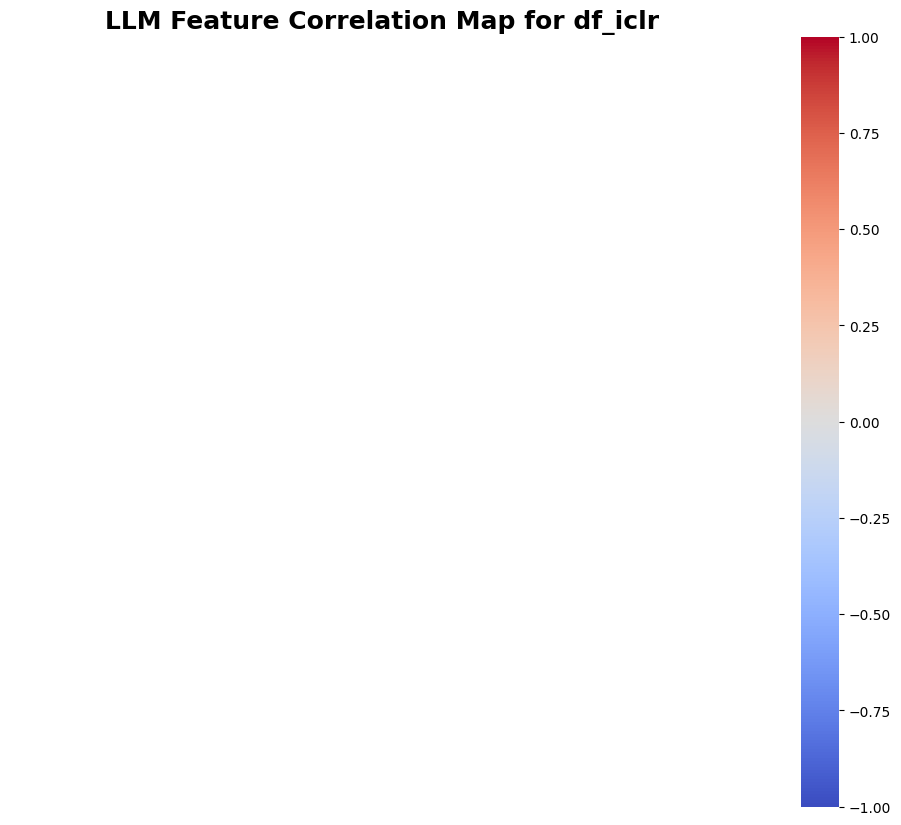

/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/ali/Review_Quality_Benchmark/.venv/lib/python3.10/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


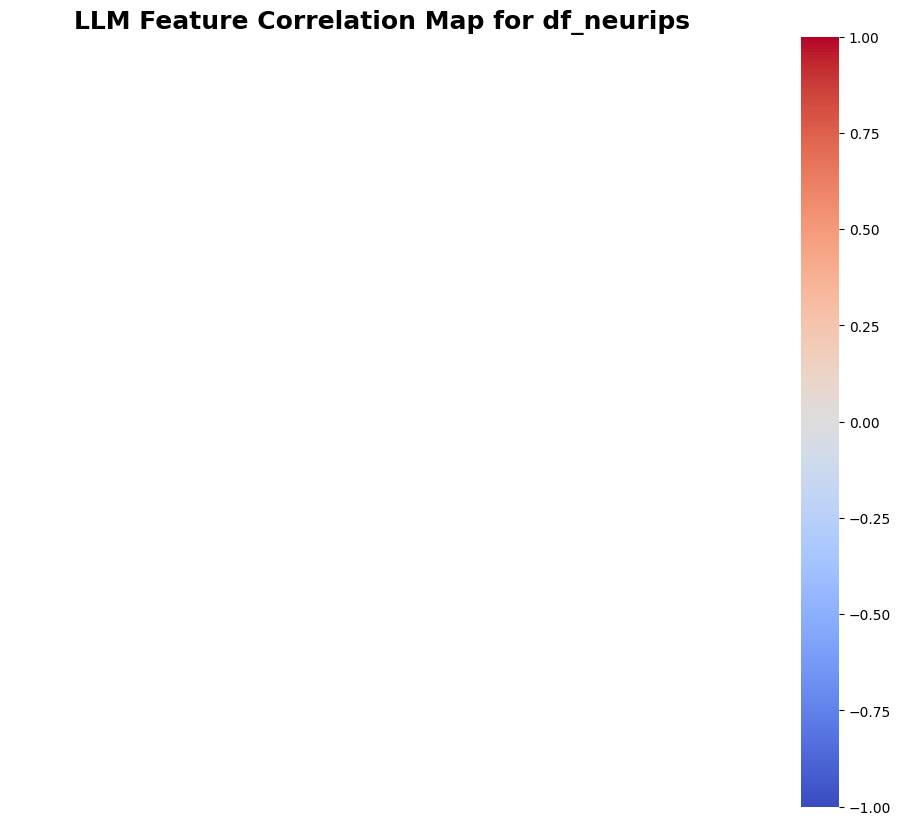

In [9]:
# Function to plot LLM-based feature correlations with improved readability
def plot_llm_feature_correlation(df, title):
    llm_columns = [col for col in df.select_dtypes(include=['float64', 'int64']).columns if col.startswith('llm_')]
    llm_correlation_matrix = df[llm_columns].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(llm_correlation_matrix, annot=False, cmap='coolwarm', cbar=True, vmin=-1, vmax=1,
                linewidths=0.5, linecolor='black', annot_kws={"size": 12})
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.yticks(fontsize=12, fontweight='bold')
    plt.show()

# Plot LLM-based feature correlations for each dataframe
# plot_llm_feature_correlation(df_ha, 'LLM Feature Correlation Map for df_ha')
plot_llm_feature_correlation(df_iclr, 'LLM Feature Correlation Map for df_iclr')
plot_llm_feature_correlation(df_neurips, 'LLM Feature Correlation Map for df_neurips')

# 3. Descriptive Statistics

Descriptive Statistics for Review-Related Features (ICLR):
       review_rating  review_confidence  review_soundness  \
count       28028.00           28028.00          28028.00   
mean            5.15               3.64              2.61   
std             1.72               0.81              0.70   
min             1.00               1.00              1.00   
25%             3.00               3.00              2.00   
50%             5.00               4.00              3.00   
75%             6.00               4.00              3.00   
max            10.00               5.00              4.00   

       review_presentation  review_contribution  
count             28028.00             28028.00  
mean                  2.64                 2.38  
std                   0.75                 0.70  
min                   1.00                 1.00  
25%                   2.00                 2.00  
50%                   3.00                 2.00  
75%                   3.00               

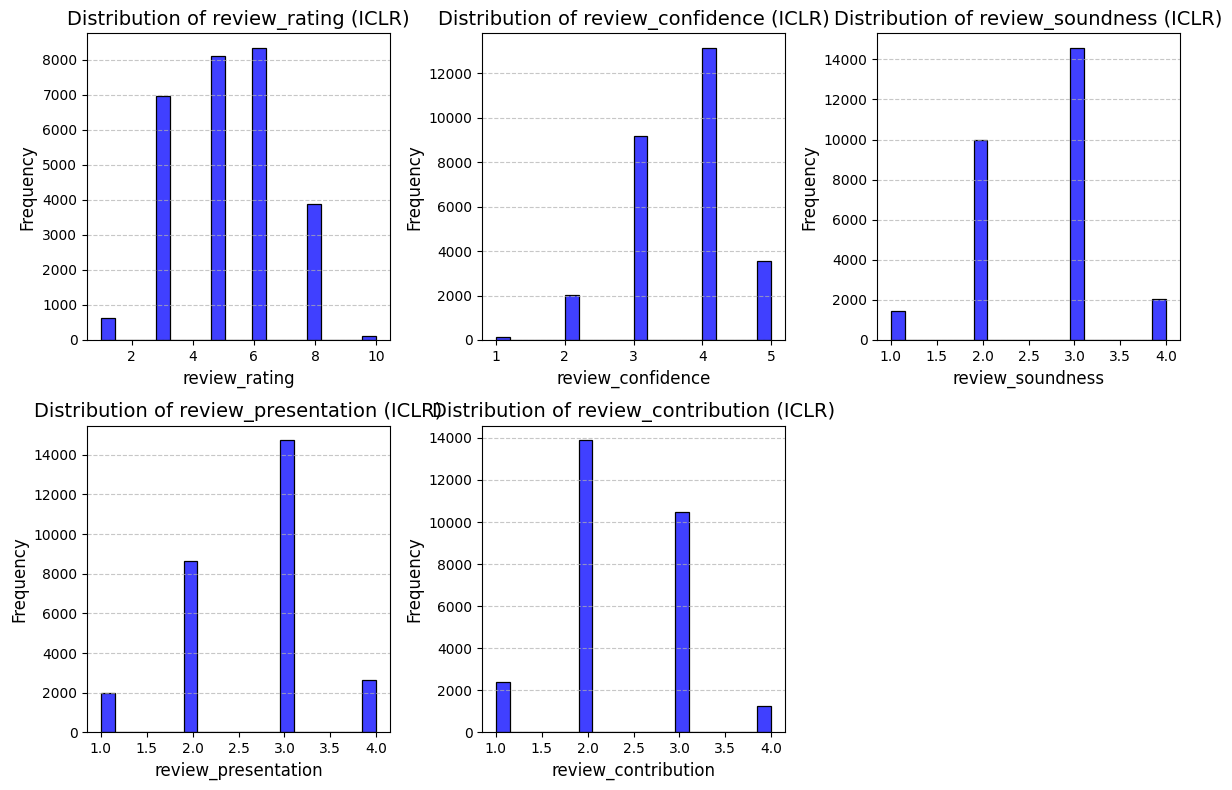

Descriptive Statistics for Review-Related Features (NeurIPS):
       review_rating  review_confidence  review_soundness  \
count       15175.00           15175.00          15175.00   
mean            5.90               3.54              2.98   
std             1.19               0.87              0.62   
min             1.00               1.00              1.00   
25%             5.00               3.00              3.00   
50%             6.00               4.00              3.00   
75%             7.00               4.00              3.00   
max            10.00               5.00              4.00   

       review_presentation  review_contribution  
count             15175.00             15175.00  
mean                  2.92                 2.75  
std                   0.70                 0.64  
min                   1.00                 1.00  
25%                   3.00                 2.00  
50%                   3.00                 3.00  
75%                   3.00            

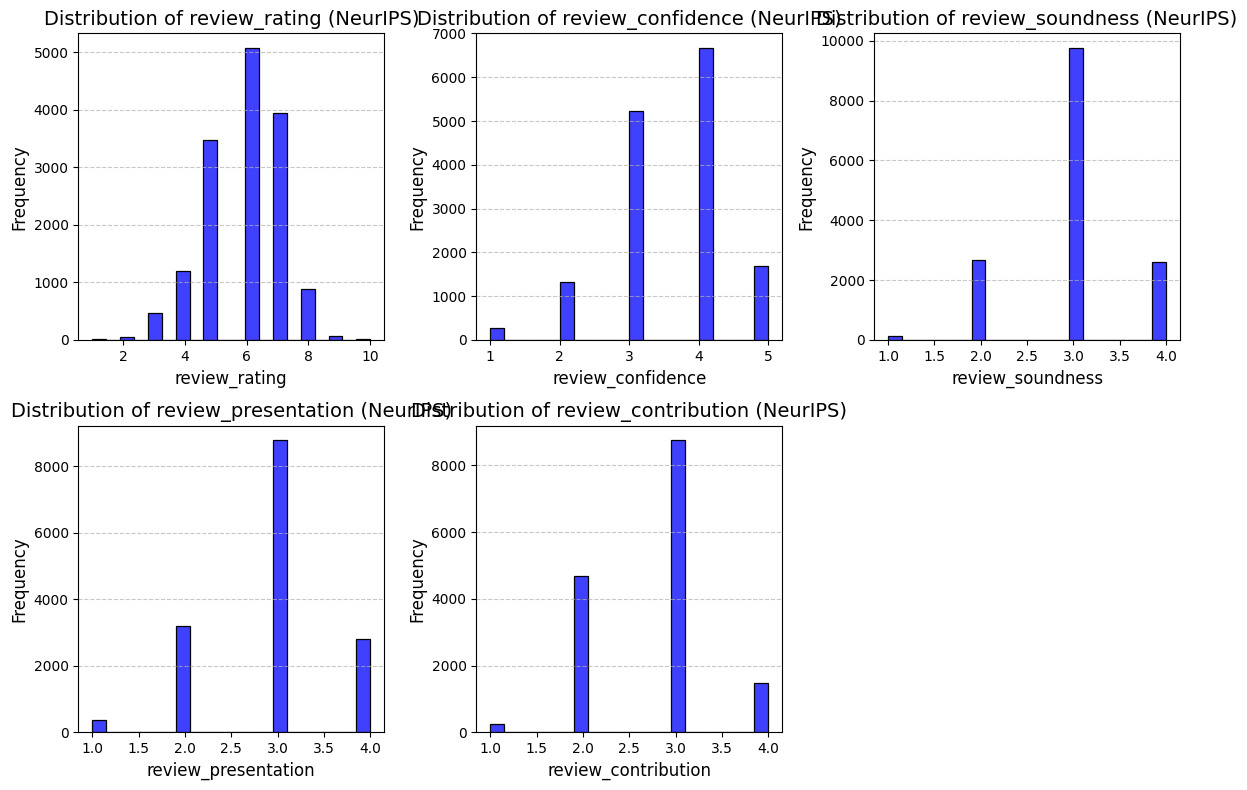

In [7]:
# List of dataframes and their corresponding titles
dataframes = [(df_iclr, 'ICLR'), (df_neurips, 'NeurIPS')]

for df, title in dataframes:
    # Select review-related features
    review_features = ['review_rating', 'review_confidence', 'review_soundness', 'review_presentation', 'review_contribution']
    
    # Calculate descriptive statistics
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    review_stats = numerical_columns[review_features].describe()
    print(f"Descriptive Statistics for Review-Related Features ({title}):")
    print(review_stats.round(2))
    
    # Visualize distributions of review-related features
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(review_features, 1):
        plt.subplot(2, 3, i)
        sns.histplot(numerical_columns[feature], bins=20, color='blue')
        plt.title(f"Distribution of {feature} ({title})", fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# 4. Submission-Level Analysis

Aggregated Metrics for ICLR:
   submission_number  avg_review_rating  var_review_rating  \
0                  1               5.25           0.250000   
1                  2               4.75           1.583333   
2                  3               4.25           2.250000   
3                  5               6.00           2.000000   
4                  9               6.50           1.000000   

   avg_review_confidence  var_review_confidence  avg_politeness_score  \
0                   3.75                   0.25              0.269500   
1                   3.75                   0.25              0.392125   
2                   4.25                   0.25              0.149500   
3                   3.25                   0.25              0.246775   
4                   3.75                   0.25              0.486275   

   avg_citation_count  avg_similarity_score  avg_sentiment_polarity  
0                2.25              0.910317                0.099397  
1                3.

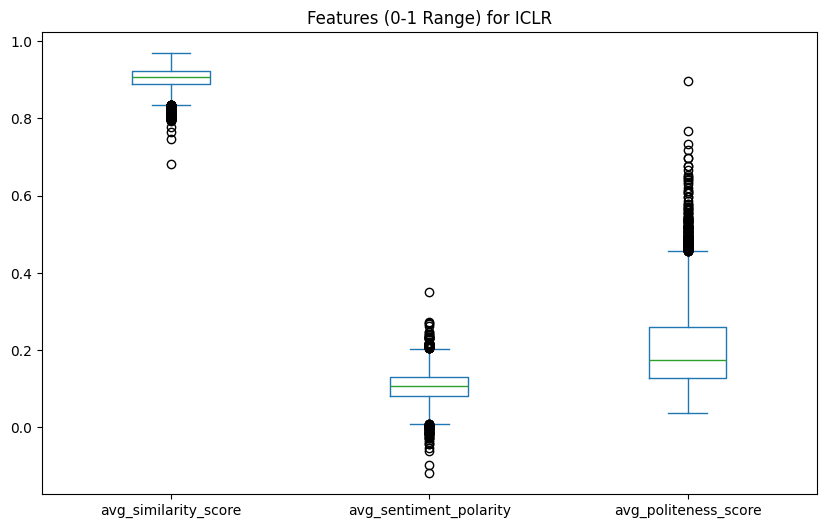

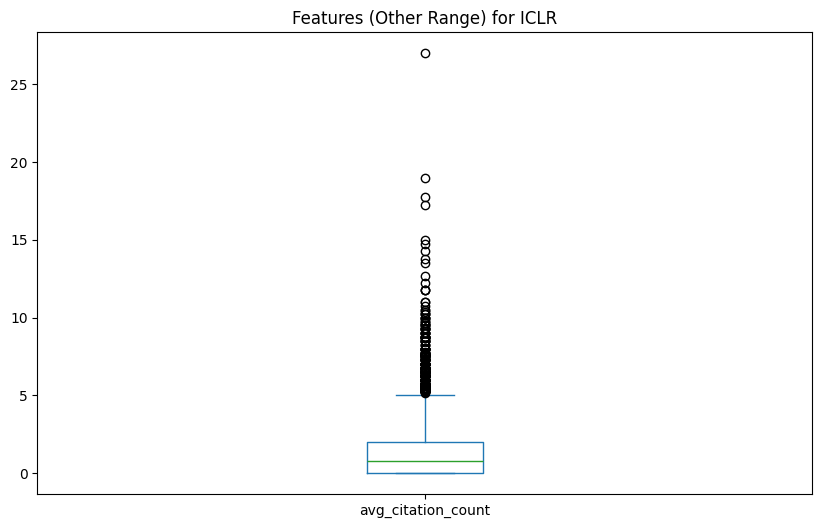

Aggregated Metrics for NeurIPS:
   submission_number  avg_review_rating  var_review_rating  \
0                  8           5.750000           3.583333   
1                 10           4.400000           3.800000   
2                 19           5.400000           1.300000   
3                 21           5.833333           0.966667   
4                 22           7.400000           0.800000   

   avg_review_confidence  var_review_confidence  avg_politeness_score  \
0               4.500000               0.333333              0.161200   
1               3.800000               0.200000              0.129560   
2               3.200000               0.200000              0.315900   
3               2.666667               1.866667              0.267517   
4               3.600000               0.300000              0.223220   

   avg_citation_count  avg_similarity_score  avg_sentiment_polarity  
0            1.500000              0.899710                0.120893  
1            1.8

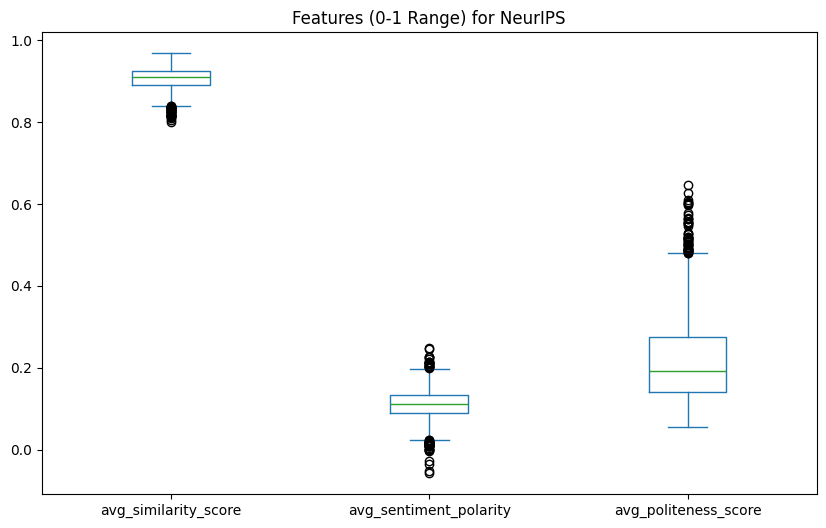

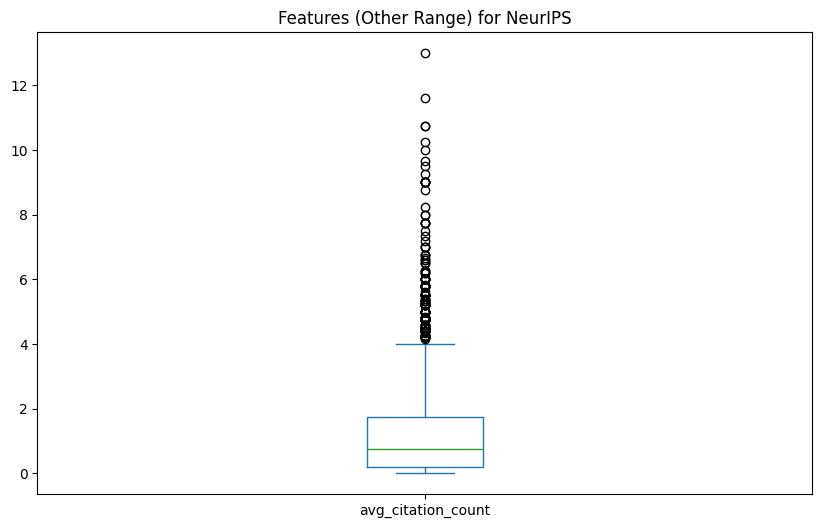

In [8]:
# Function to analyze aggregated metrics for a given dataframe
def analyze_reviews(df, title):
    # Group by submission_number and calculate aggregated metrics
    grouped = df.groupby('submission_number').agg({
        'review_rating': ['mean', 'var'],
        'review_confidence': ['mean', 'var'],
        'politeness_score': 'mean',
        'citation_count': 'mean',
        'similarity_score': 'mean',
        'sentiment_polarity': 'mean'
    })

    # Rename columns for better readability
    grouped.columns = [
        'avg_review_rating', 'var_review_rating',
        'avg_review_confidence', 'var_review_confidence',
        'avg_politeness_score', 'avg_citation_count',
        'avg_similarity_score', 'avg_sentiment_polarity'
    ]
    grouped.reset_index(inplace=True)

    # Display the aggregated metrics
    print(f"Aggregated Metrics for {title}:")
    print(grouped.head())

    # Separate features into two groups based on their value ranges
    features_0_1 = ['avg_similarity_score', 'avg_sentiment_polarity', 'avg_politeness_score']
    features_other = ['avg_citation_count']

    # Visualize features with values between 0 and 1
    grouped[features_0_1].plot(kind='box', figsize=(10, 6), title=f"Features (0-1 Range) for {title}")
    plt.show()

    # Visualize features with values outside the 0-1 range
    grouped[features_other].plot(kind='box', figsize=(10, 6), title=f"Features (Other Range) for {title}")
    plt.show()

# Analyze df_iclr
analyze_reviews(df_iclr, 'ICLR')

# Analyze df_neurips
analyze_reviews(df_neurips, 'NeurIPS')

# 5. Temporal Analysis

Average Submission to Review Days (ICLR): 52.63
Average Review Creation to Submission Days (ICLR): 12.99


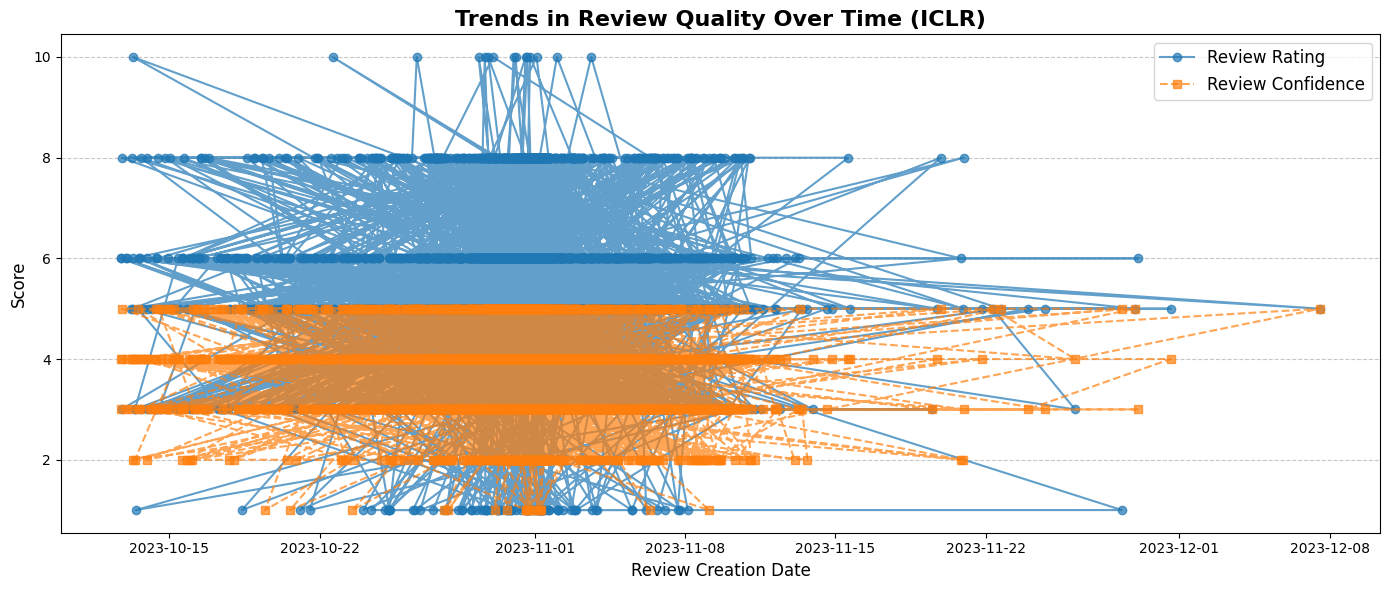

Average Submission to Review Days (NeurIPS): 217.76
Average Review Creation to Submission Days (NeurIPS): 158.67


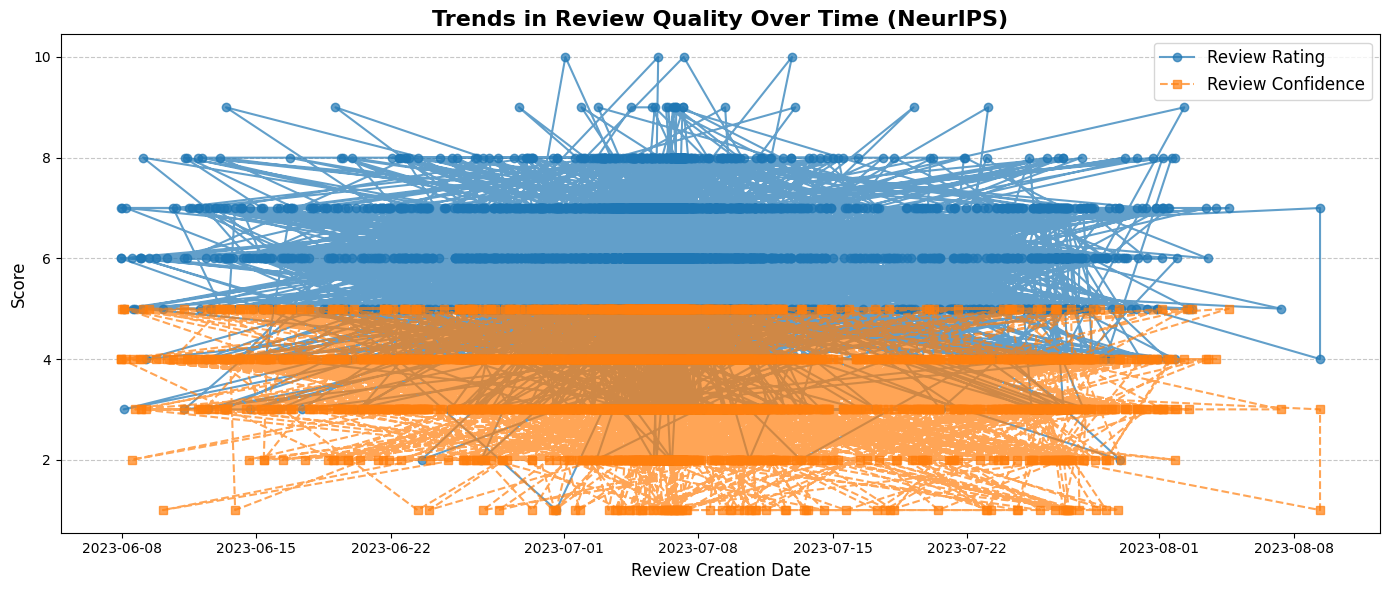

In [40]:
# Function to analyze temporal trends
def analyze_temporal_trends(df, title):
    # Convert timestamps to datetime for better readability
    df['submission_creation_date'] = pd.to_datetime(df['submission_creation_date'], unit='ms')
    df['creation_date'] = pd.to_datetime(df['creation_date'], unit='ms')
    df['last_modification_date'] = pd.to_datetime(df['last_modification_date'], unit='ms')

    # Calculate average review timelines
    avg_submission_to_review_days = df['paper_submission_to_review_submission_days'].mean()
    avg_review_creation_to_submission_days = df['review_creation_to_review_submission_days'].mean()
    print(f"Average Submission to Review Days ({title}): {avg_submission_to_review_days:.2f}")
    print(f"Average Review Creation to Submission Days ({title}): {avg_review_creation_to_submission_days:.2f}")

    # Plot trends in review quality over time
    plt.figure(figsize=(14, 6))
    plt.plot(df['creation_date'], df['review_rating'], label='Review Rating', marker='o', linestyle='-', alpha=0.7)
    plt.plot(df['creation_date'], df['review_confidence'], label='Review Confidence', marker='s', linestyle='--', alpha=0.7)
    plt.title(f"Trends in Review Quality Over Time ({title})", fontsize=16, fontweight='bold')
    plt.xlabel("Review Creation Date", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Analyze temporal trends for df_iclr
analyze_temporal_trends(df_iclr, 'ICLR')

# Analyze temporal trends for df_neurips
analyze_temporal_trends(df_neurips, 'NeurIPS')

# Paper: Review Dataset Statistics

* Number of Papers
* Number of Reviews in total 
* #review per paper on average 
* Number of non-anonymous Reviewers
* Review Length min/mean/ std /max 
* Time Taken to Submit Reviews (days)

Table with all the stats

Plot 1 : review length 

Time to submit review 

In [52]:
# Count unique paper IDs in each dataframe
unique_papers_iclr = df_iclr['submission_id'].nunique()
unique_papers_neurips = df_neurips['submission_id'].nunique()

print(f"Number of unique papers in df_iclr: {unique_papers_iclr}")
print(f"Number of unique papers in df_neurips: {unique_papers_neurips}")

Number of unique papers in df_iclr: 7262
Number of unique papers in df_neurips: 3395


In [53]:
# Count the number of rows (total reviews) in each dataframe
total_reviews_iclr = len(df_iclr)
total_reviews_neurips = len(df_neurips)

print(f"Total reviews in df_iclr: {total_reviews_iclr}")
print(f"Total reviews in df_neurips: {total_reviews_neurips}")

Total reviews in df_iclr: 28028
Total reviews in df_neurips: 15175


In [54]:
# Calculate average number of reviews per paper
avg_reviews_per_paper_iclr = total_reviews_iclr / unique_papers_iclr
avg_reviews_per_paper_neurips = total_reviews_neurips / unique_papers_neurips

print(f"Average number of reviews per paper in ICLR: {avg_reviews_per_paper_iclr:.2f}")
print(f"Average number of reviews per paper in NeurIPS: {avg_reviews_per_paper_neurips:.2f}")

Average number of reviews per paper in ICLR: 3.86
Average number of reviews per paper in NeurIPS: 4.47


In [57]:
# Calculate and print statistics for df_iclr
iclr_stats = df_iclr['Comprehensiveness'].agg(['min', 'max', 'mean', 'std'])
print("Review Length Statistics for ICLR:")
print(iclr_stats)

# Calculate and print statistics for df_neurips
neurips_stats = df_neurips['Comprehensiveness'].agg(['min', 'max', 'mean', 'std'])
print("\nReview Length Statistics for NeurIPS:")
print(neurips_stats)

Review Length Statistics for ICLR:
min        4.000000
max     3177.000000
mean     424.502462
std      236.506597
Name: Comprehensiveness, dtype: float64

Review Length Statistics for NeurIPS:
min        5.000000
max     3374.000000
mean     439.366063
std      242.664414
Name: Comprehensiveness, dtype: float64


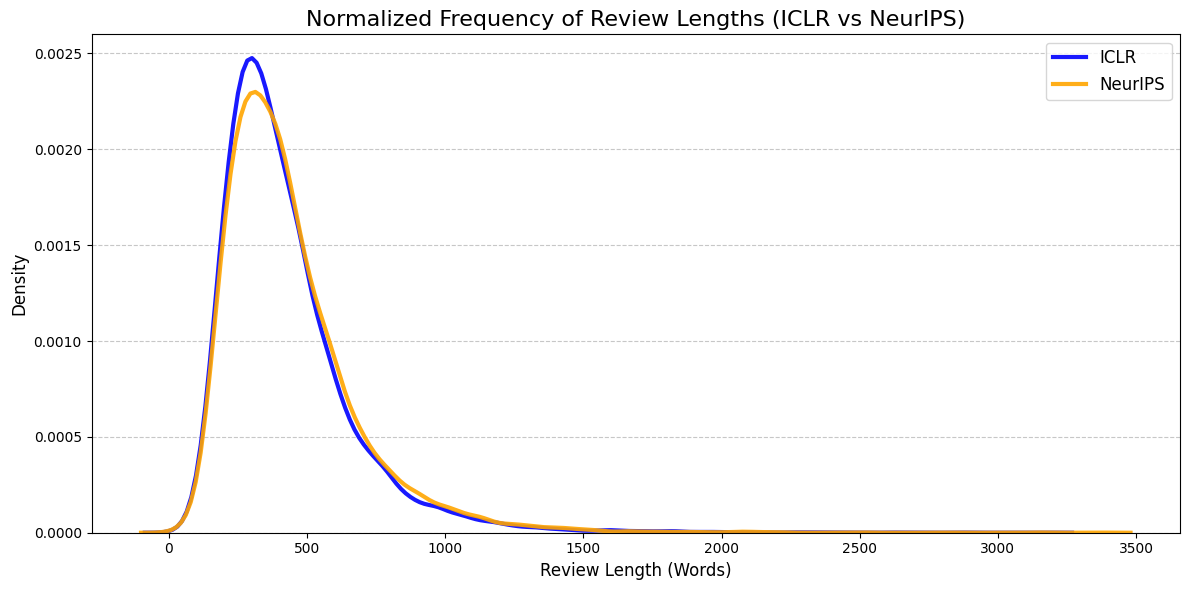

In [59]:
# Plot normalized frequency of review lengths for both conferences
plt.figure(figsize=(12, 6))
sns.kdeplot(df_iclr['Comprehensiveness'], label='ICLR', color='blue', fill=False, alpha=0.9, linewidth=3)
sns.kdeplot(df_neurips['Comprehensiveness'], label='NeurIPS', color='orange', fill=False, alpha=0.9, linewidth=3)
plt.title('Normalized Frequency of Review Lengths (ICLR vs NeurIPS)', fontsize=16)
plt.xlabel('Review Length (Words)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
# Calculate averages for ICLR
avg_citation_count_iclr = df_iclr['Factuality_C'].mean()
avg_question_count_iclr = df_iclr['Factuality_Q'].mean()

# Calculate averages for NeurIPS
avg_citation_count_neurips = df_neurips['Factuality_C'].mean()
avg_question_count_neurips = df_neurips['Factuality_Q'].mean()

# Print the results
print(f"Average Citation Count (ICLR): {avg_citation_count_iclr:.2f}")
print(f"Average Question Count (ICLR): {avg_question_count_iclr:.2f}")
print(f"Average Citation Count (NeurIPS): {avg_citation_count_neurips:.2f}")
print(f"Average Question Count (NeurIPS): {avg_question_count_neurips:.2f}")

Average Citation Count (ICLR): 1.42
Average Question Count (ICLR): 4.02
Average Citation Count (NeurIPS): 1.25
Average Question Count (NeurIPS): 3.76


In [61]:
''' 
'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality'
'''

# Define the columns of interest
columns_of_interest = ['Usage_of_Technical_Terms', 'Sentiment_Polarity', 'Relevance_Alignment', 'Politeness', ]

# Convert columns to numeric, coercing errors to NaN
df_iclr[columns_of_interest] = df_iclr[columns_of_interest].apply(pd.to_numeric, errors='coerce')
df_neurips[columns_of_interest] = df_neurips[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# Calculate mean and std for ICLR
iclr_stats = df_iclr[columns_of_interest].agg(['mean', 'std'])
print("ICLR Statistics (Mean and Std):")
print(iclr_stats)

# Calculate mean and std for NeurIPS
neurips_stats = df_neurips[columns_of_interest].agg(['mean', 'std'])
print("\nNeurIPS Statistics (Mean and Std):")
print(neurips_stats)

ICLR Statistics (Mean and Std):
      Usage_of_Technical_Terms  Sentiment_Polarity  Relevance_Alignment  \
mean                  0.778113            0.106639             0.903166   
std                   0.035971            0.065788             0.041372   

      Politeness  
mean    0.204089  
std     0.189514  

NeurIPS Statistics (Mean and Std):
      Usage_of_Technical_Terms  Sentiment_Polarity  Relevance_Alignment  \
mean                  0.776241            0.110290             0.906674   
std                   0.034450            0.064071             0.039288   

      Politeness  
mean    0.215150  
std     0.197571  


In [16]:
# Define the columns of interest
# columns_of_interest = ['hedge_C', 'hedge_D', 'hedge_E', 'hedge_I', 'hedge_N']

# # Convert columns to numeric, coercing errors to NaN
# df_iclr[columns_of_interest] = df_iclr[columns_of_interest].apply(pd.to_numeric, errors='coerce')
# df_neurips[columns_of_interest] = df_neurips[columns_of_interest].apply(pd.to_numeric, errors='coerce')

# # Calculate mean and std for ICLR
# iclr_stats = df_iclr[columns_of_interest].agg(['mean', 'std'])
# print("ICLR Statistics (Mean and Std):")
# print(iclr_stats)

# # Calculate mean and std for NeurIPS
# neurips_stats = df_neurips[columns_of_interest].agg(['mean', 'std'])
# print("\nNeurIPS Statistics (Mean and Std):")
# print(neurips_stats)

ICLR Statistics (Mean and Std):
        hedge_C   hedge_D   hedge_E   hedge_I   hedge_N
mean  89.809048  0.101720  0.287427  0.066041  0.048630
std    9.365003  0.339111  0.645734  0.299901  0.275983

NeurIPS Statistics (Mean and Std):
        hedge_C   hedge_D   hedge_E   hedge_I   hedge_N
mean  90.189259  0.105107  0.252257  0.059638  0.052916
std    9.700777  0.350991  0.592802  0.285983  0.288448


In [63]:
''' 
'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality'
'''

# Define the columns of interest
columns_of_interest = ['Overall_Quality', 'Confidence', 'Soundness', 'Presentation', 'Contribution']

# Calculate mean and std for df_neurips
neurips_stats = df_neurips[columns_of_interest].agg(['mean', 'std', 'min', 'max'])
print("\nNeurIPS Statistics (Mean and Std):")
print(neurips_stats)

# Calculate mean and std for df_iclr
iclr_stats = df_iclr[columns_of_interest].agg(['mean', 'std', 'min', 'max'])
print("ICLR Statistics (Mean and Std):")
print(iclr_stats)


NeurIPS Statistics (Mean and Std):
      Overall_Quality  Confidence  Soundness  Presentation  Contribution
mean         5.895157    3.539044   2.976013      2.923558      2.752883
std          1.193878    0.866866   0.620339      0.701696      0.643801
min          1.000000    1.000000   1.000000      1.000000      1.000000
max         10.000000    5.000000   4.000000      4.000000      4.000000
ICLR Statistics (Mean and Std):
      Overall_Quality  Confidence  Soundness  Presentation  Contribution
mean         5.145747    3.641715   2.614885      2.643143      2.378336
std          1.722286    0.809065   0.696470      0.749941      0.704798
min          1.000000    1.000000   1.000000      1.000000      1.000000
max         10.000000    5.000000   4.000000      4.000000      4.000000


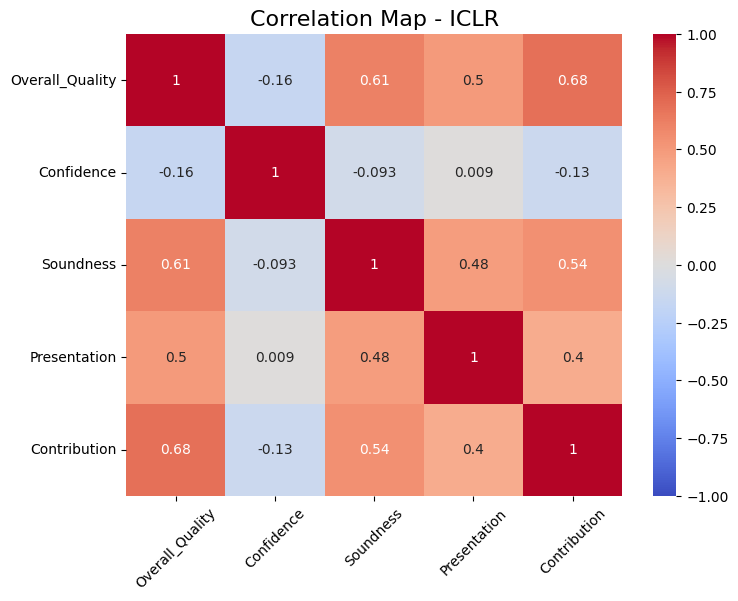

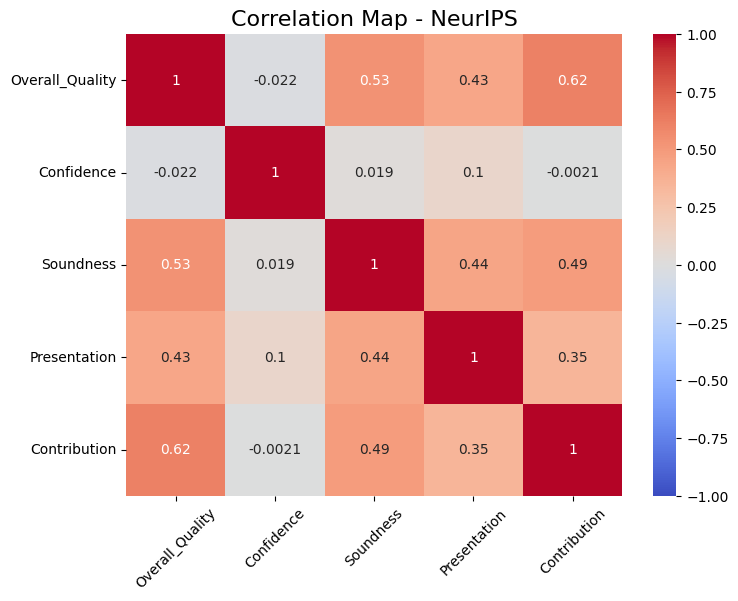

In [66]:
# Function to plot correlation map for specific columns with a black border on all sides
def plot_selected_correlation_map(df, columns, title):
    # Create a mapping for renaming columns in the figure
    renamed_columns = {
        'review_rating': 'Overall_Quality',
        'review_confidence': 'Confidence',
        'review_soundness': 'Soundness',
        'review_presentation': 'Presentation',
        'review_contribution': 'Contribution'
    }
    
    # Rename columns for the correlation matrix
    correlation_matrix = df[columns].rename(columns=renamed_columns).corr()
    
    plt.figure(figsize=(8, 6))
    ax = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10, rotation=0)
    
    # Add black border to all four sides
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)
    
    plt.show()

# Plot correlation map for df_iclr
plot_selected_correlation_map(df_iclr, columns_of_interest, 'Correlation Map - ICLR')

# Plot correlation map for df_neurips
plot_selected_correlation_map(df_neurips, columns_of_interest, 'Correlation Map - NeurIPS')

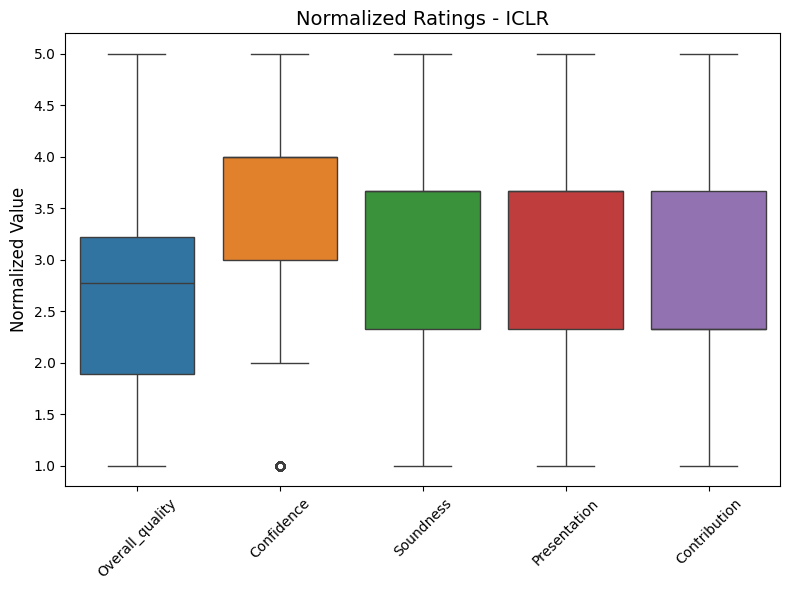

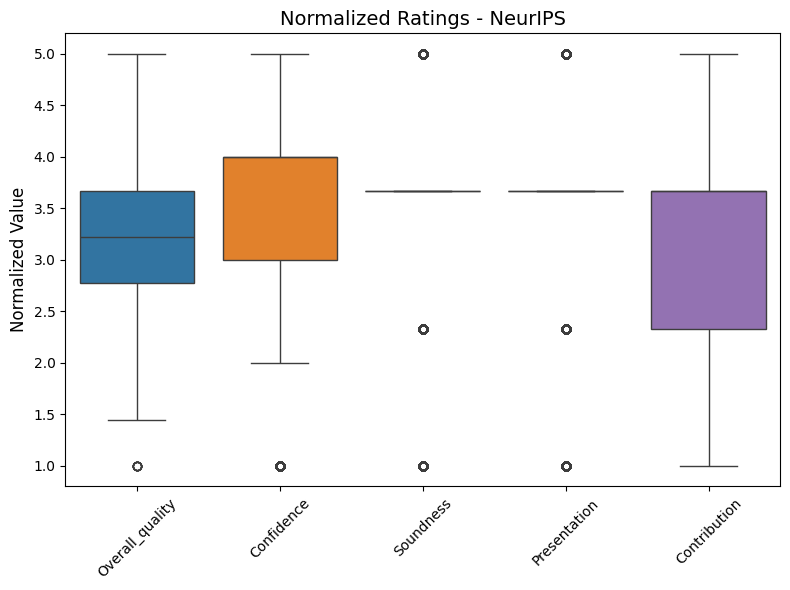

In [69]:
''' 
'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality'
'''


import matplotlib.pyplot as plt
import seaborn as sns

columns_of_interest = ['Overall_Quality', 'Confidence', 'Soundness', 'Presentation', 'Contribution']
# Normalize the columns for each conference
for df in [df_iclr, df_neurips]:
    for col in columns_of_interest:
        df[f"{col}_normalized"] = 1 + 4 * (df[col] - df[col].min()) / (df[col].max() - df[col].min())


# Separate figures for each conference
# Plot for ICLR
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_iclr[[f"{col}_normalized" for col in columns_of_interest]])
plt.title("Normalized Ratings - ICLR", fontsize=14)
plt.xticks(
    ticks=range(len(columns_of_interest)),
    labels=[col.replace('review_', '').capitalize() for col in columns_of_interest],
    rotation=45,
    fontsize=10,
)
plt.ylabel("Normalized Value", fontsize=12)
plt.tight_layout()
plt.show()

# Plot for NeurIPS
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_neurips[[f"{col}_normalized" for col in columns_of_interest]])
plt.title("Normalized Ratings - NeurIPS", fontsize=14)
plt.xticks(
    ticks=range(len(columns_of_interest)),
    labels=[col.replace('review_', '').capitalize() for col in columns_of_interest],
    rotation=45,
    fontsize=10,
)
plt.ylabel("Normalized Value", fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipykernel_3822596/2214508195.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


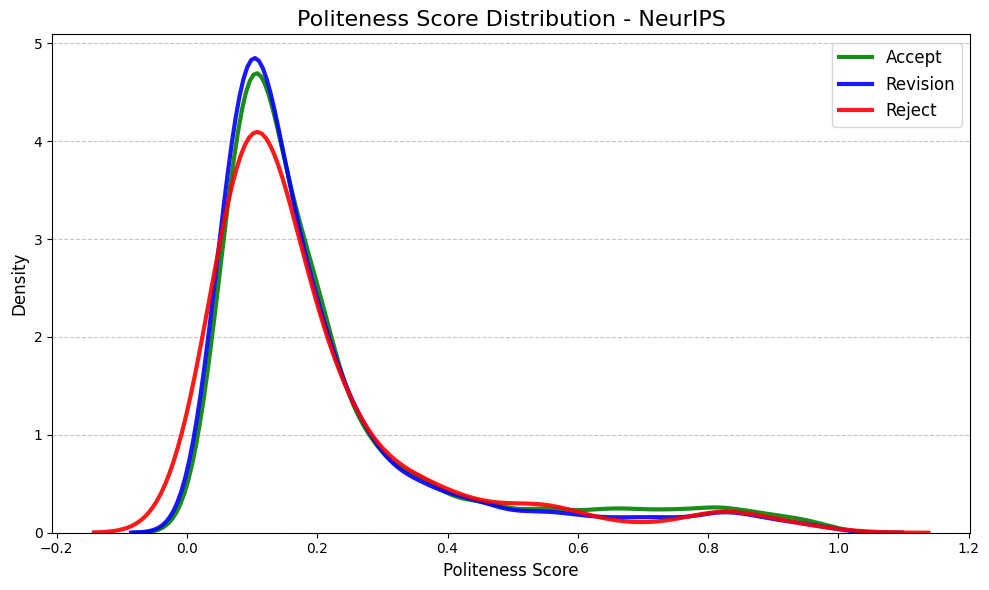

/tmp/ipykernel_3822596/2214508195.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


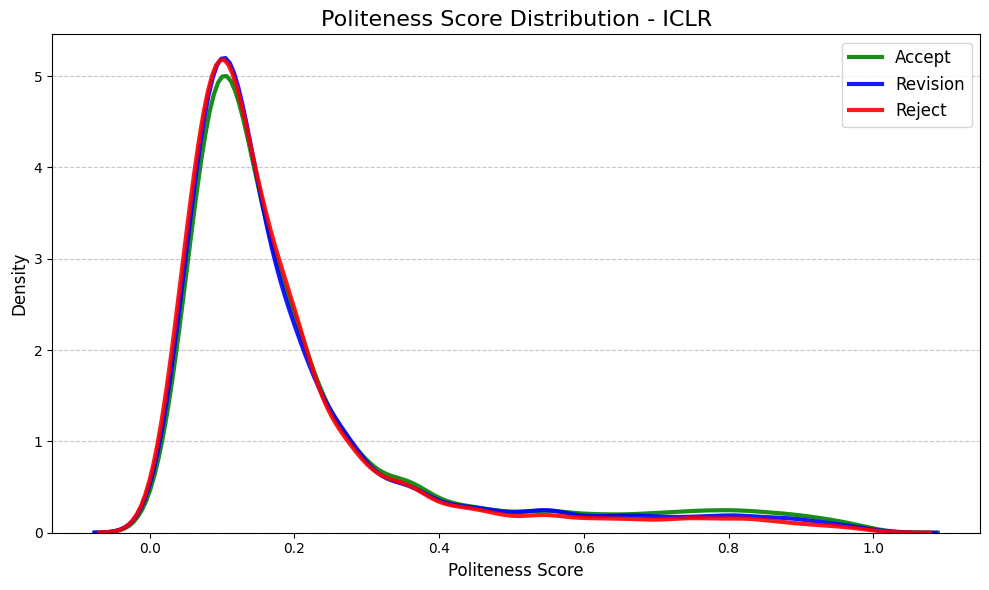

In [75]:
''' 
'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality'
'''

# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define a function to plot politeness_score per decision distribution
def plot_politeness_distribution(df, title):
    # Add a decision column based on review_rating [1, 4) reject, [4, 6) revision, [6, 10] accept
    df['decision'] = pd.cut(df['Overall_Quality'], bins=[0, 4, 6, 10], labels=['Reject', 'Revision', 'Accept'], right=False)
    
    # Plot politeness_score distribution
    plt.figure(figsize=(10, 6))
    for decision in df['decision'].unique():
        sns.kdeplot(
            data=df[df['decision'] == decision],
            x='Politeness',
            label=decision,
            color=color_map.get(decision, 'black'),
            fill=False,
            alpha=0.9,
            linewidth=3
        )
    plt.title(f"Politeness Score Distribution - {title}", fontsize=16)
    plt.xlabel("Politeness Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot for df_neurips
plot_politeness_distribution(df_neurips, 'NeurIPS')

# Plot for df_iclr
plot_politeness_distribution(df_iclr, 'ICLR')

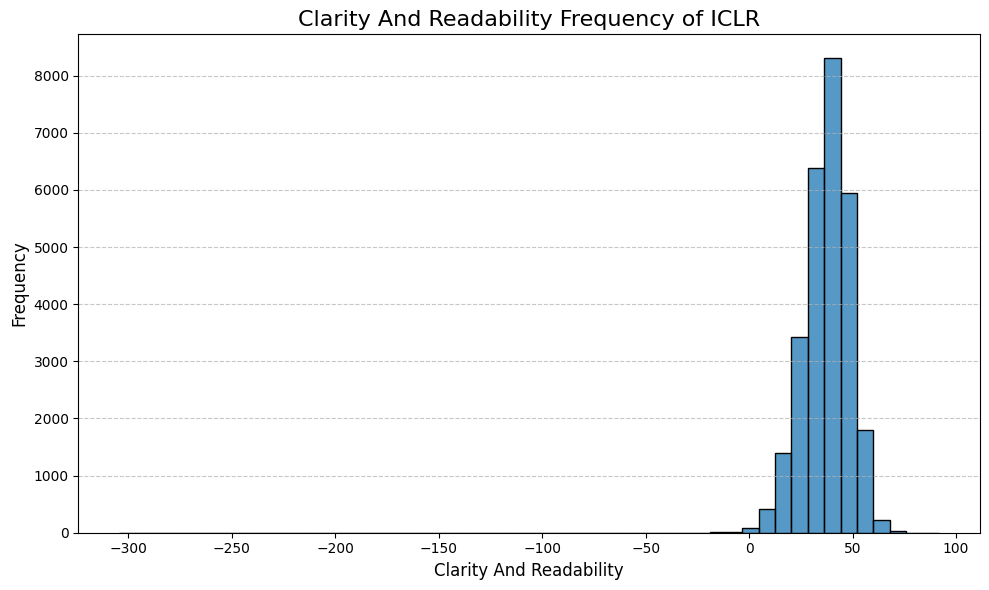

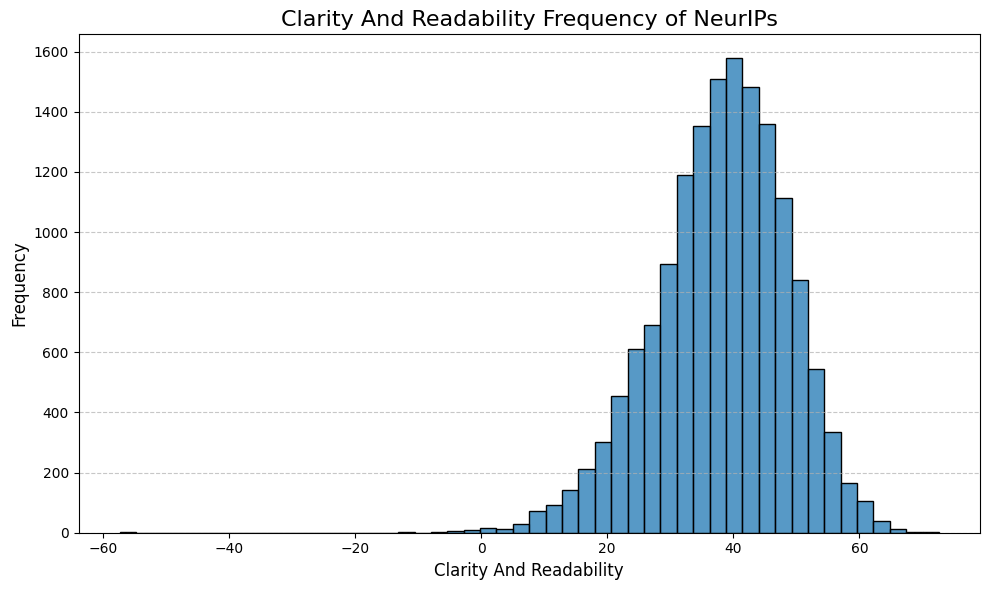

In [72]:
''' 
'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality'
'''

import seaborn as sns
import matplotlib.pyplot as plt


def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    plt.title(f"{column.replace('_', ' ').title()} Frequency of {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

for df, label in [(df_iclr, 'ICLR'), (df_neurips, 'NeurIPs')]:
    for col in ['Clarity_and_Readability']:
        plot_frequency(df, col, label)

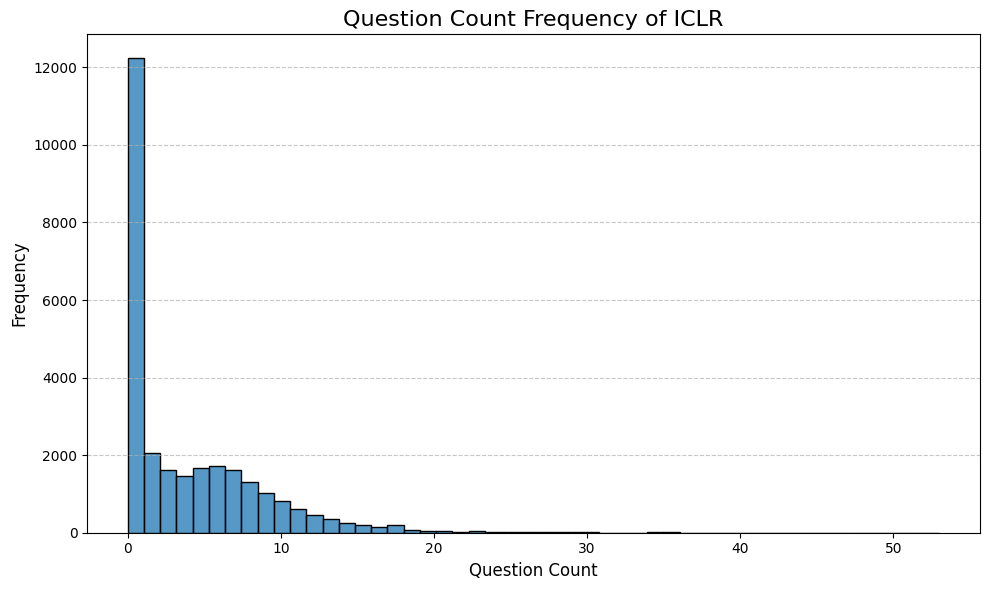

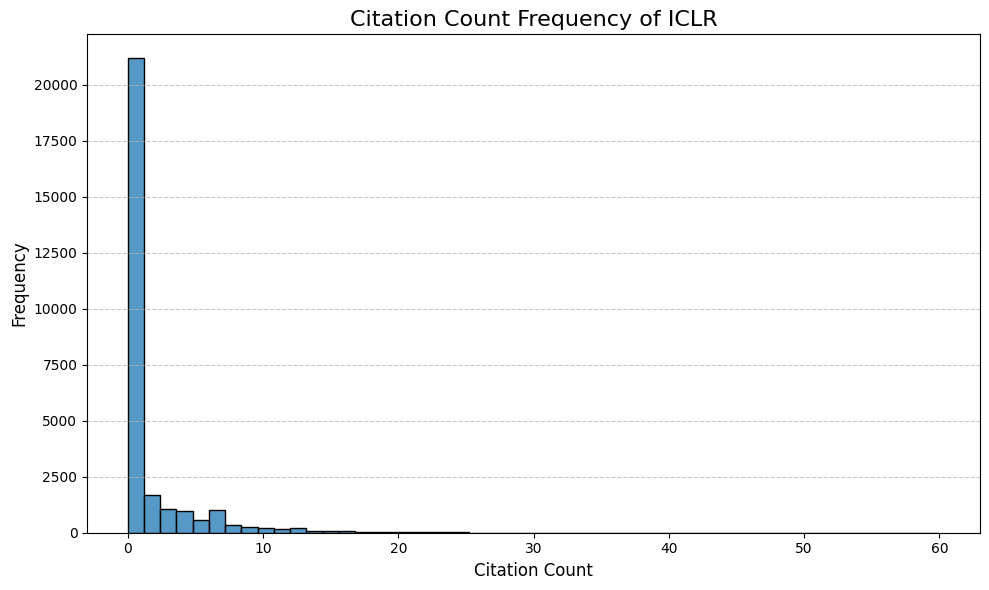

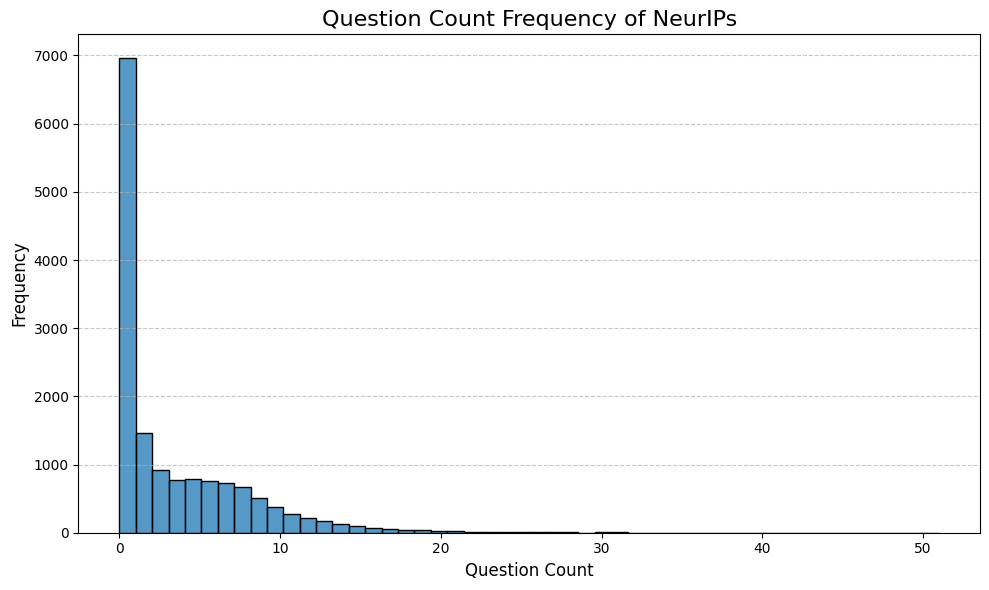

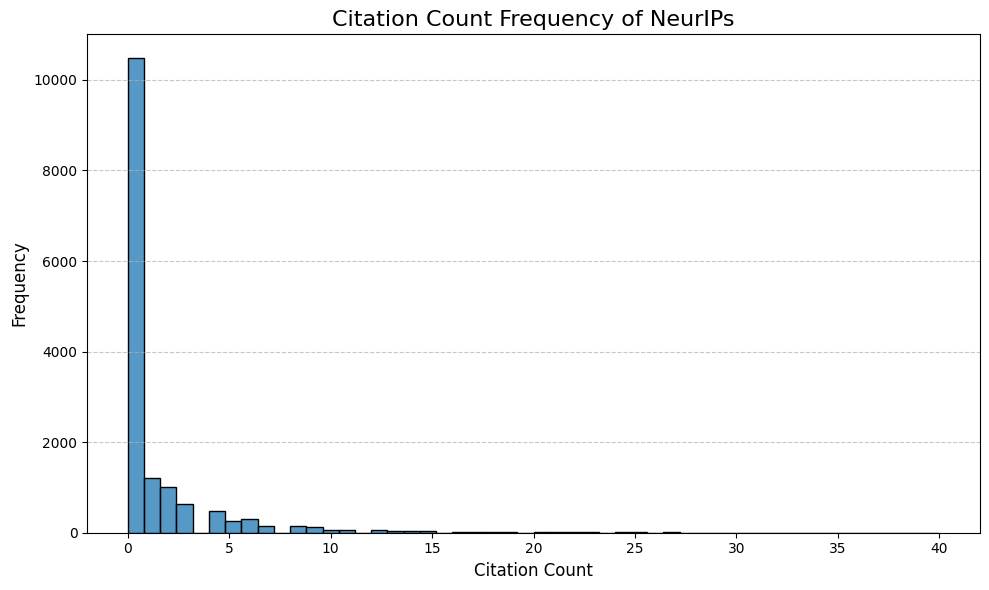

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


def plot_frequency(df, column, title, bins=50):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=column,
        bins=bins,
        kde=False
    )
    plt.title(f"{column.replace('_', ' ').title()} Frequency of {title}",
              fontsize=16)
    plt.xlabel(column.replace('_', ' ').title(), fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


for df, label in [(df_iclr, 'ICLR'), (df_neurips, 'NeurIPs')]:
    for col in ['question_count', 'citation_count']:
        plot_frequency(df, col, label)

/tmp/ipykernel_3822596/717731707.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


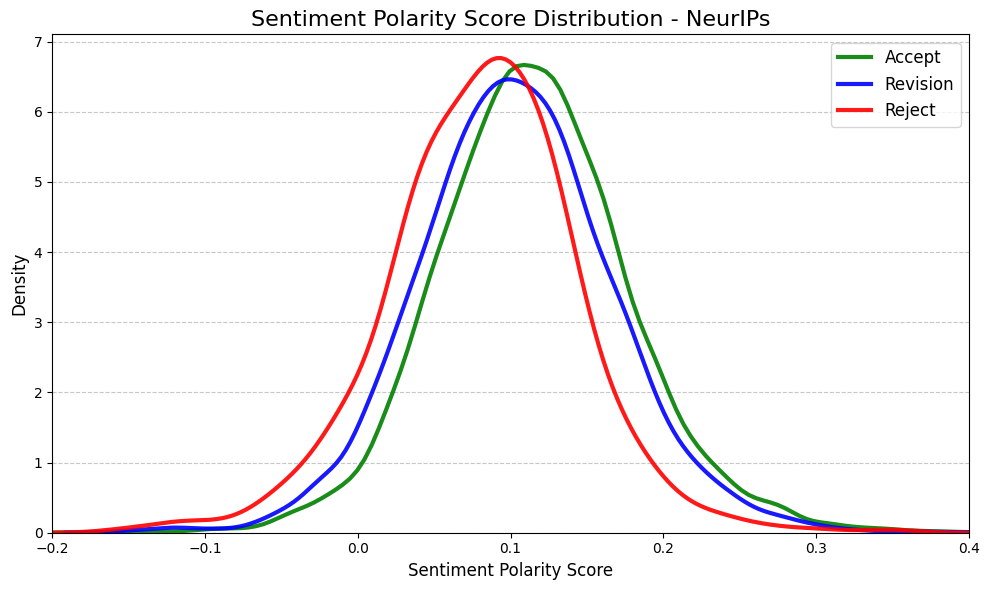

/tmp/ipykernel_3822596/717731707.py:22: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


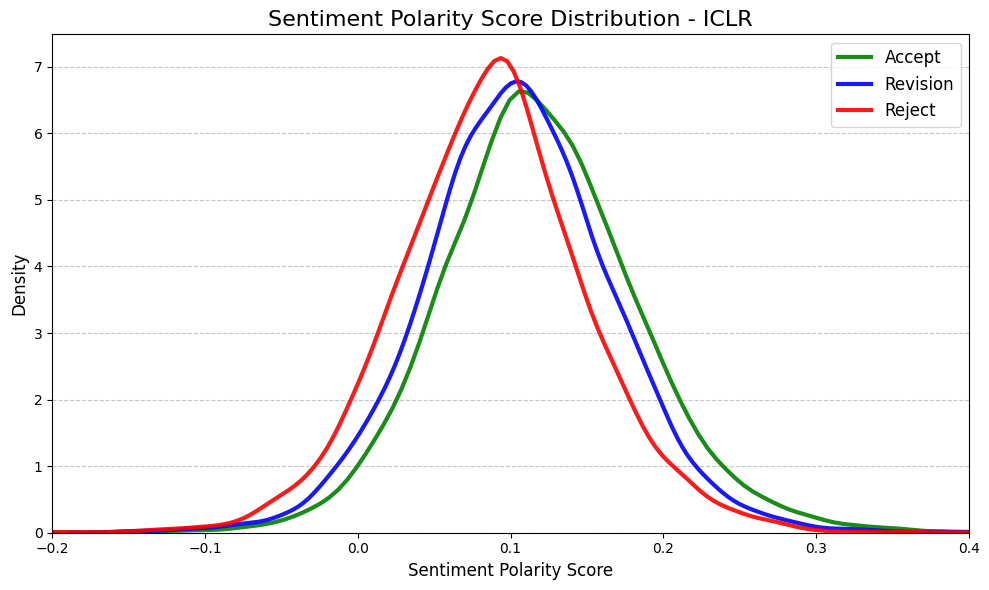

In [77]:
''' 
'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment',
'review_rating': 'Overall_Quality'
'''

# color map for suggestions/decisions
color_map = {
    'Accept': 'green',
    'Reject': 'red',
    'Revision': 'blue'
}

# Define a function to plot politeness_score per decision distribution
def plot_polarity_distribution(df, title):
    # Add a decision column based on review_rating
    df['decision'] = pd.cut(df['Overall_Quality'], bins=[0, 4, 6, 10], labels=['Reject', 'Revision', 'Accept'], right=False)
    
    # Plot politeness_score distribution
    plt.figure(figsize=(10, 6))
    for decision in df['decision'].unique():
        sns.kdeplot(
            data=df[df['decision'] == decision],
            x='Sentiment_Polarity',
            label=decision,
            color=color_map.get(decision, 'black'),
            fill=False,
            alpha=0.9,
            linewidth=3
        )
    plt.title(f"Sentiment Polarity Score Distribution - {title}", fontsize=16)
    plt.xlabel("Sentiment Polarity Score", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend(title="", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xlim(-0.2, 0.4)
    plt.tight_layout()
    plt.show()

# Plot for df_neurips
plot_polarity_distribution(df_neurips, 'NeurIPs')

# Plot for df_iclr
plot_polarity_distribution(df_iclr, 'ICLR')